<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Comapre_MP_JV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 946 kB 9.5 MB/s 
     |████████████████████████████████| 292 kB 43.5 MB/s 


In [2]:
from jarvis.db.figshare import data

dft_3d = data('dft_3d')
mp_megnet=data('megnet')

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:03<00:00, 9.63MiB/s]


Loading the zipfile...
Loading completed.
Obtaining MEGNET-3D CFID dataset 69k...
Reference:https://pubs.acs.org/doi/10.1021/acs.chemmater.9b01294


100%|██████████| 562M/562M [00:30<00:00, 18.3MiB/s]


Loading the zipfile...
Loading completed.


In [4]:
# data-size
print (len(dft_3d),len(mp_megnet))

55723 69239


In [5]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(dft_3d)
dg_mp=pd.DataFrame(mp_megnet)

In [7]:
df['id']=df['reference']

In [12]:
dg_mp

,id,desc,formula,e_hull,gap pbe,mu_b,elastic anisotropy,bulk modulus,shear modulus,atoms,e_form
0,mp-10,"[1020.05, 887.2444, 3.9000000000000004, -61.97...",As,0.107405,0.0000,-2.7e-06,NaN,NaN,NaN,"{'lattice_mat': [[3.35275227, 0.0, 1.93571242]...",0.107405
1,mp-100,"[7557.8, 4876.272, 0.0, -165.05, 0.0, 171.6649...",Hf,0.181111,0.0000,-1.35e-05,NaN,NaN,NaN,"{'lattice_mat': [[2.89172723, 0.0, -1.02237997...",0.181111
2,mp-1000,"[3186.4249999999997, 1702.1225, 5.4525, -103.1...",BaTe,0,1.5930,7.9e-06,-5.15413,-1.50564,-52.7222,"{'lattice_mat': [[4.34157255, 0.0, 2.50660808]...",-1.790168
3,mp-10000,"[4137.835, 2797.079605, 4.0, -90.7925, 0.0, 96...",Hf2S,0,0.0000,6.11e-05,0.353099,131.402,73.9132,"{'lattice_mat': [[3.38667876, 0.0, 0.0], [-1.6...",-1.253224
4,mp-10003,"[5028.316666666667, 3796.988033333333, 7.64466...",Nb4CoSi,0.0192721,0.0064,0,0.03,191,97,"{'lattice_mat': [[5.02169644, 0.0, 0.0], [0.0,...",-0.343178
...,...,...,...,...,...,...,...,...,...,...,...
69234,mp-715469,"[3960.96, 2959.36265, 6.045, -86.5047, 0.0, 89...",WO3,na,1.1162,na,na,na,na,"{'lattice_mat': [[3.86270157, 0.0, 2.365222556...",-2.182536
69235,mp-25593,"[2177.61, 1638.1885, 8.835, -25.37139999999999...",NiO2,na,1.5195,na,na,na,na,"{'lattice_mat': [[2.6928644737314733, 0.0, 4.3...",-0.549193
69236,mp-604573,"[550.0, 550.1854, 3.5999999999999996, -13.9537...",P,na,0.0000,na,na,na,na,"{'lattice_mat': [[2.43836828, 0.0, 1.493069954...",0.141298
69237,mp-19283,"[3960.96, 2959.36265, 6.045, -86.5047, 0.0, 89...",WO3,na,1.3694,na,na,na,na,"{'lattice_mat': [[7.6791002095113825, 0.0, 0.0...",-2.184021


In [8]:
df2=pd.merge(df,dg_mp,on='id')

In [9]:
len(df2)

30595

In [10]:
df2.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula_x',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms_x',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'refere

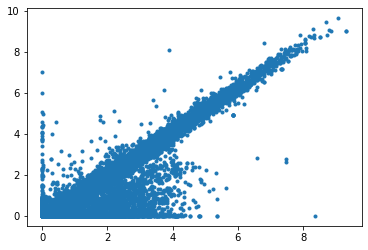

In [11]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df2['gap pbe'],df2['optb88vdw_bandgap'],'.')

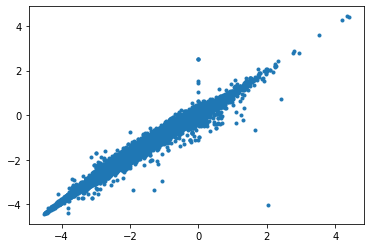

In [12]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df2['e_form'],df2['formation_energy_peratom'],'.')